# Introduction

This lab introduces SVM tie-breaking and its effect on decision boundary. In SVM, tie-breaking is the mechanism used to resolve the conflicts between the two or more classes when their distances are equal. It is not enabled by default when **decision_function_shape='ovr'** because it is costly. Therefore, this lab illustrates the effect of the **break_ties** parameter for a multiclass classification problem and **decision_function_shape='ovr'**.

# Import Required Libraries

In this step, we will import the required libraries for SVM and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Create Sample Data

In this step, we will create a sample dataset using the **make_blobs** function from scikit-learn. This dataset contains 3 classes and 2 features.

In [2]:
X, y = make_blobs(random_state=27)

# Create SVM Model with and without Tie-Breaking

In this step, we will create two SVM models - one with tie-breaking disabled and another with tie-breaking enabled. We will use the **SVC** class from scikit-learn to create these models. The **break_ties** parameter is set to **False** and **True** for the two models, respectively.

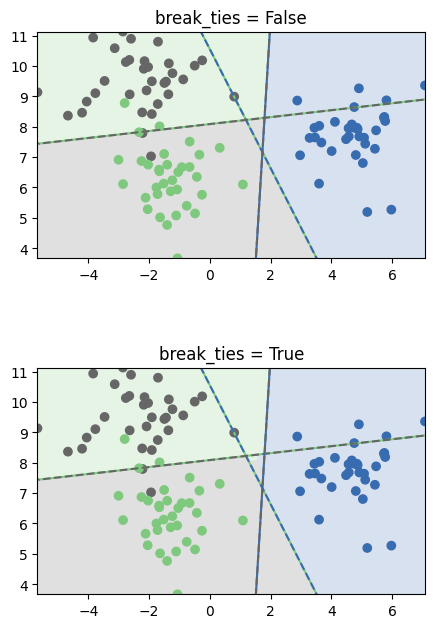

In [4]:
fig, sub = plt.subplots(2, 1, figsize=(5, 8))
titles = ("break_ties = False", "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):
    svm = SVC(
        kernel="linear", C=1, break_ties=break_ties, decision_function_shape="ovr"
    ).fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    colors = [plt.cm.Accent(i) for i in [0, 4, 7]]

    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    ax.imshow(
        -pred.reshape(xx.shape),
        cmap="Accent",
        alpha=0.2,
        extent=(xlim[0], xlim[1], ylim[1], ylim[0]),
    )

    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=colors[col[0]])
        ax.plot(line2, line, "--", c=colors[col[1]])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()

The two plots differ only in the area in the middle where the classes are tied. If break_ties=False, all input in that area would be classified as one class, whereas if break_ties=True, the tie-breaking mechanism will create a non-convex decision boundary in that area.

# Summary

This lab illustrated the effect of SVM tie-breaking on decision boundary. We created two SVM models - one with tie-breaking disabled and another with tie-breaking enabled. We then plotted the decision boundary for both models. The decision boundary for the model with tie-breaking enabled was non-convex in the area where the classes were tied.